# 多项逻辑回归 Multinomial Logit
$$
P(y_i=k|{x}_i)=
\begin{cases}
\frac{1}{1+\sum_{l=2}^K{exp({x}_i^{'}{\beta}_l)}} & (k=1)\\
\frac{exp({x}_i^{'}{\beta}_k)}{1+\sum_{l=2}^{K}{exp({x}_i^{'}{\beta}_l)}} & (k=2,\cdots,K)\\
\end{cases}
$$
sklearn.metrices模块中的classification_report函数：
* precision表示准确率。
* recall表示灵敏度。
* f1-score表示准确率和灵敏度的加权平均数，默认为recall权重更高。
* support表示the number of occurrences of each class in y_true。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/Users/singal/Desktop/MLPython_Data/Glass.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Text(0.5, 0, 'The Type of Glass')

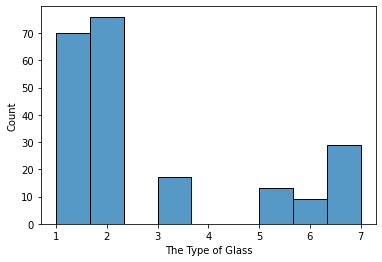

In [3]:
sns.histplot(data=data,x=data.Type)
plt.xlabel('The Type of Glass')

<AxesSubplot:xlabel='Type', ylabel='Mg'>

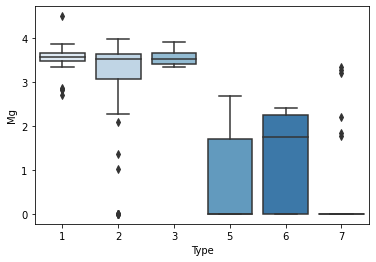

In [4]:
sns.boxplot(x='Type',y='Mg',data=data,palette='Blues')

In [5]:
from sklearn.model_selection import train_test_split#该函数按变量顺序返回一个列表
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as slm

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,stratify=y,test_size=0.3)

In [7]:
model=LogisticRegression(multi_class='multinomial',solver='newton-cg',C=1e10,max_iter=1000)
model.fit(xtrain,ytrain)

LogisticRegression(C=10000000000.0, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')

In [8]:
model.coef_

array([[-9.08403150e+02,  1.12546137e+01,  3.18795947e+01,
        -8.17094001e+00,  1.73694339e+01,  1.16271123e+01,
         2.47028122e+01,  5.06192199e+01,  1.51546960e+02],
       [-3.33802275e+02,  5.87937517e+00,  2.42284103e+01,
        -1.02212282e+01,  1.16150670e+01,  5.78510996e+00,
         1.78768078e+01,  6.22813776e+01,  1.54199954e+02],
       [-2.48624635e+03,  1.83379707e+01,  3.71975452e+01,
        -2.60812920e+00,  1.97443721e+01,  1.46571663e+01,
         3.18158088e+01,  8.04387493e+01,  1.44172358e+02],
       [-1.43646172e+00, -3.30409030e+01, -2.79557313e+01,
         1.02389026e+02,  2.85822005e+00,  5.56857983e+01,
         8.08884217e+00, -1.66712157e+02,  1.14927776e+02],
       [-6.01906150e+00,  3.22653150e+01, -5.06189967e+00,
        -2.22954275e+00, -2.83421215e+00, -1.10994680e+02,
        -1.89625133e+01, -9.32153822e+01, -6.46333853e+01],
       [ 3.73590730e+03, -3.46963673e+01, -6.02879185e+01,
        -7.91591857e+01, -4.87528564e+01,  2.323949

In [9]:
model.intercept_

array([-312.81287899, -605.09997835, 1725.52231602,    4.3035305 ,
         -2.95640475, -808.9565841 ])

In [10]:
model.score(xtest,ytest)

0.6307692307692307

In [11]:
prob=model.predict_proba(xtest)
pred=model.predict(xtest)
print(prob[:5],pred[:5],sep='\n\n')

[[6.89739582e-01 2.75030524e-01 3.52298941e-02 5.76721963e-69
  1.49665312e-28 1.74245077e-11]
 [2.86630238e-01 2.92200022e-01 4.21169740e-01 1.44932283e-43
  6.21727886e-33 1.00648163e-14]
 [6.04531998e-01 2.58982120e-01 1.36485881e-01 3.64470419e-42
  2.65101064e-36 8.48642102e-10]
 [7.87421046e-01 1.43097621e-01 6.94813331e-02 4.70916319e-50
  4.55685502e-45 1.56546420e-18]
 [1.14039197e-04 9.97024849e-01 2.86111170e-03 9.64265696e-45
  1.36977508e-55 1.69542560e-41]]

[1 3 1 1 2]


In [12]:
print(slm.confusion_matrix(ytest,pred),'\n','-'*30)
print(pd.crosstab(ytest,pred,rownames=['Actual'],colnames=['Predicted']))

[[15  3  2  0  1  0]
 [ 5 13  1  1  1  2]
 [ 1  2  2  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  1  1  1  0]
 [ 0  0  0  1  1  7]] 
 ------------------------------
Predicted   1   2  3  5  6  7
Actual                       
1          15   3  2  0  1  0
2           5  13  1  1  1  2
3           1   2  2  0  0  0
5           0   0  0  3  0  1
6           0   0  1  1  1  0
7           0   0  0  1  1  7


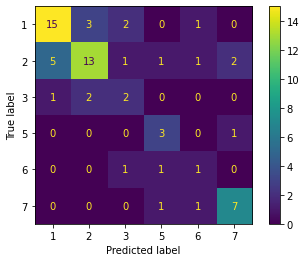

In [13]:
slm.plot_confusion_matrix(model,xtest,ytest)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

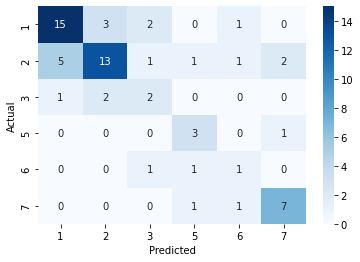

In [14]:
table=pd.crosstab(ytest,pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(table,cmap='Blues',annot=True)

In [15]:
slm.cohen_kappa_score(ytest,pred)

0.5146235220908525

In [16]:
print(slm.classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        21
           2       0.72      0.57      0.63        23
           3       0.33      0.40      0.36         5
           5       0.50      0.75      0.60         4
           6       0.25      0.33      0.29         3
           7       0.70      0.78      0.74         9

    accuracy                           0.63        65
   macro avg       0.54      0.59      0.56        65
weighted avg       0.65      0.63      0.64        65



In multiclass tasks, labels are binarized under a one-vs-rest way; while confusion_matrix calculates one confusion matrix for confusion between every two classes.

In [17]:
print(slm.multilabel_confusion_matrix(ytest,pred))

[[[38  6]
  [ 6 15]]

 [[37  5]
  [10 13]]

 [[56  4]
  [ 3  2]]

 [[58  3]
  [ 1  3]]

 [[59  3]
  [ 2  1]]

 [[53  3]
  [ 2  7]]]
